In [1]:
#import libraries
import pandas as pd
import numpy as np
import re

In [2]:
#Open Manufacturing workers data
df = pd.read_csv("data/workers-factories-wages-mexico-annual.csv")
df

,Year,State,Border,Jobs,Factories,Average wage
0,2007,Total nacional,No,1902121.0,5140.0,13120.12137
1,2008,Total nacional,No,1738182.0,5254.0,13360.18494
2,2009,Total nacional,No,1645291.0,5214.0,14170.40792
3,2010,Total nacional,No,1810482.0,5108.0,13945.50058
4,2011,Total nacional,No,1879114.0,5079.0,14183.43239
...,...,...,...,...,...,...
280,2017,Otras entidades federativas,No,134260.0,266.0,13080.53332
281,2018,Otras entidades federativas,No,143292.0,264.0,12842.36016
282,2019,Otras entidades federativas,No,142102.0,267.0,12634.71062
283,2020,Otras entidades federativas,No,135569.0,264.0,14349.70094


In [3]:
#Comparar cambio de empleo, fabrica y salarios entre borde y no borde}
df2 = pd.DataFrame()
df2 ["Jobs-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Jobs"].agg("sum"))
df2 ["Factories-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Factories"].agg("sum"))
df2 ["Wages-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Average wage"].agg("mean"))
df2 ["Jobs-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Jobs"].agg("sum"))
df2 ["Factories-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Factories"].agg("sum"))
df2 ["Wages-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Average wage"].agg("mean"))

In [4]:
df2

,Jobs-Border,Factories-Border,Wages-Border,Jobs-NoBorder,Factories-NoBorder,Wages-NoBorder
0,1075641.0,2863.0,12009.732316,2728601.0,7417.0,14710.603340
1,969573.0,2928.0,12381.590855,2506791.0,7580.0,14665.766126
2,906243.0,2900.0,13708.631936,2384339.0,7528.0,14871.102510
3,1009470.0,2825.0,13079.934416,2611494.0,7391.0,14830.709226
4,1037658.0,2809.0,13206.783828,2720570.0,7349.0,15438.969228
5,1110698.0,2814.0,12591.215328,2872822.0,7394.0,15668.930234
6,1172911.0,2829.0,12573.801602,3059133.0,7455.0,15126.693457
7,1269282.0,2757.0,12290.086870,3244022.0,7283.0,14689.186119
8,1333670.0,2750.0,12761.539464,3381442.0,7262.0,15415.473134
9,1407491.0,2762.0,13152.794766,3550763.0,7274.0,15480.036635


In [5]:
df2["Year"] = list(df["Year"].unique())
df2

,Jobs-Border,Factories-Border,Wages-Border,Jobs-NoBorder,Factories-NoBorder,Wages-NoBorder,Year
0,1075641.0,2863.0,12009.732316,2728601.0,7417.0,14710.603340,2007
1,969573.0,2928.0,12381.590855,2506791.0,7580.0,14665.766126,2008
2,906243.0,2900.0,13708.631936,2384339.0,7528.0,14871.102510,2009
3,1009470.0,2825.0,13079.934416,2611494.0,7391.0,14830.709226,2010
4,1037658.0,2809.0,13206.783828,2720570.0,7349.0,15438.969228,2011
5,1110698.0,2814.0,12591.215328,2872822.0,7394.0,15668.930234,2012
6,1172911.0,2829.0,12573.801602,3059133.0,7455.0,15126.693457,2013
7,1269282.0,2757.0,12290.086870,3244022.0,7283.0,14689.186119,2014
8,1333670.0,2750.0,12761.539464,3381442.0,7262.0,15415.473134,2015
9,1407491.0,2762.0,13152.794766,3550763.0,7274.0,15480.036635,2016


In [6]:
df3 = pd.DataFrame()

In [7]:
df3 ["Year"] = df2["Year"]
df3["Job change - border"] = df2["Jobs-Border"] / df2["Jobs-Border"].iat[0] * 100 
df3["Factories change - border"] = df2["Factories-Border"] / df2["Factories-Border"].iat[0] * 100
df3["Wages change - border"] = df2["Wages-Border"] / df2["Wages-Border"].iat[0] * 100
df3["Job change - no border"] = df2["Jobs-NoBorder"] / df2["Jobs-NoBorder"].iat[0] * 100 
df3["Factories change - no border"] = df2["Factories-NoBorder"] / df2["Factories-NoBorder"].iat[0] * 100
df3["Wages change - no border"] = df2["Wages-NoBorder"] / df2["Wages-NoBorder"].iat[0] * 100 

In [8]:
df3

,Year,Job change - border,Factories change - border,Wages change - border,Job change - no border,Factories change - no border,Wages change - no border
0,2007,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2008,90.139089,102.270346,103.096310,91.870926,102.197654,99.695205
2,2009,84.251437,101.292351,114.146024,87.383205,101.496562,101.091044
3,2010,93.848226,98.672721,108.911124,95.708167,99.649454,100.816458
4,2011,96.468803,98.113867,109.967345,99.705673,99.083187,104.951299
5,2012,103.259173,98.288509,104.841765,105.285529,99.689902,106.514532
6,2013,109.042980,98.812435,104.696768,112.113607,100.512337,102.828505
7,2014,118.002382,96.297590,102.334395,118.889570,98.193340,99.854410
8,2015,123.988394,96.053091,106.259983,123.925851,97.910206,104.791576
9,2016,130.851371,96.472232,109.517801,130.131265,98.071997,105.230467


<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

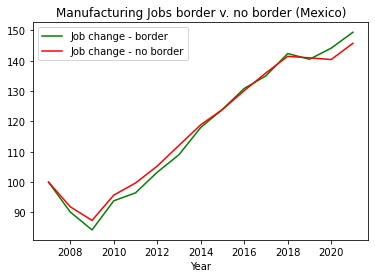

In [9]:
# Create a graphic
df3.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Manufacturing Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

<AxesSubplot:title={'center':'Factories border v. no border (Mexico)'}, xlabel='Year'>

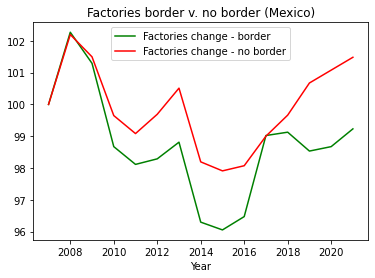

In [10]:
# Create a graphic
df3.plot(x="Year",
       y=["Factories change - border", "Factories change - no border"],
       title = "Factories border v. no border (Mexico)",
       style = {"Factories change - border":"green",
               "Factories change - no border":"red"})

<AxesSubplot:title={'center':'Manufacturing wages change border v. no border (Mexico)'}, xlabel='Year'>

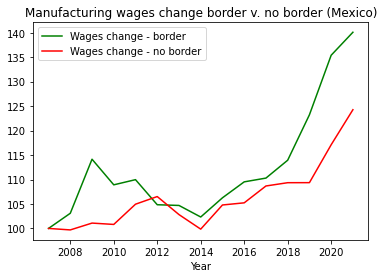

In [11]:
# Create a graphic
df3.plot(x="Year",
       y=["Wages change - border", "Wages change - no border"],
       title = "Manufacturing wages change border v. no border (Mexico)",
       style = {"Wages change - border":"green",
               "Wages change - no border":"red"})

<AxesSubplot:title={'center':'Manufacturing Jobs and wages change in the border (Mexico)'}, xlabel='Year'>

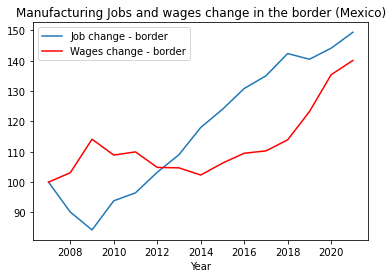

In [12]:
# Create a graphic
df3.plot(x="Year",
       y=["Job change - border", "Wages change - border"],
       title = "Manufacturing Jobs and wages change in the border (Mexico)",
       style = {"Jobs change - border":"green",
               "Wages change - border":"red"})

In [13]:
#Job, wage and salary growth by state (2007 v 2021)
df

,Year,State,Border,Jobs,Factories,Average wage
0,2007,Total nacional,No,1902121.0,5140.0,13120.12137
1,2008,Total nacional,No,1738182.0,5254.0,13360.18494
2,2009,Total nacional,No,1645291.0,5214.0,14170.40792
3,2010,Total nacional,No,1810482.0,5108.0,13945.50058
4,2011,Total nacional,No,1879114.0,5079.0,14183.43239
...,...,...,...,...,...,...
280,2017,Otras entidades federativas,No,134260.0,266.0,13080.53332
281,2018,Otras entidades federativas,No,143292.0,264.0,12842.36016
282,2019,Otras entidades federativas,No,142102.0,267.0,12634.71062
283,2020,Otras entidades federativas,No,135569.0,264.0,14349.70094


In [19]:
df2 = pd.pivot_table(df.query("Year == 2010 | Year == 2021") , values='Jobs', index='State', columns='Year')
df2

Year,2010,2021
State,,
Aguascalientes,37967.0,63036.0
Baja California,216912.0,364420.0
Chihuahua,245815.0,408068.0
Ciudad de Mexico,51311.0,21499.0
Coahuila de Zaragoza,165669.0,264349.0
Durango,25165.0,46152.0
Guanajuato,70660.0,163990.0
Jalisco,102031.0,156146.0
Mexico,117900.0,138471.0


In [20]:
df2["Jobs pct chg 2010 - 2021"] = (df2[2021] / df2[2010] - 1) * 100
df2

Year,2010,2021,Jobs pct chg 2010 - 2021
State,,,
Aguascalientes,37967.0,63036.0,66.028393
Baja California,216912.0,364420.0,68.003614
Chihuahua,245815.0,408068.0,66.006143
Ciudad de Mexico,51311.0,21499.0,-58.100602
Coahuila de Zaragoza,165669.0,264349.0,59.564553
Durango,25165.0,46152.0,83.397576
Guanajuato,70660.0,163990.0,132.083215
Jalisco,102031.0,156146.0,53.037802
Mexico,117900.0,138471.0,17.447837


In [21]:
df2.sort_values(by= ["Jobs pct chg 2010 - 2021"], ascending = False)

Year,2010,2021,Jobs pct chg 2010 - 2021
State,,,
Guanajuato,70660.0,163990.0,132.083215
Queretaro,52887.0,107124.0,102.552612
San Luis Potosi,46141.0,90954.0,97.121866
Durango,25165.0,46152.0,83.397576
Baja California,216912.0,364420.0,68.003614
Aguascalientes,37967.0,63036.0,66.028393
Chihuahua,245815.0,408068.0,66.006143
Coahuila de Zaragoza,165669.0,264349.0,59.564553
Tamaulipas,162298.0,258257.0,59.125189


In [24]:
df3 = pd.pivot_table(df.query("Year == 2010 | Year == 2021") , values='Factories', index='State', columns='Year')
df3

Year,2010,2021
State,,
Aguascalientes,83.0,93.0
Baja California,932.0,928.0
Chihuahua,478.0,488.0
Ciudad de Mexico,135.0,73.0
Coahuila de Zaragoza,373.0,394.0
Durango,74.0,75.0
Guanajuato,218.0,342.0
Jalisco,265.0,286.0
Mexico,309.0,276.0


In [28]:
df3["Factories pct chg 2010 - 2021"] = (df3[2021] / df3[2010] - 1) * 100
df3

Year,2010,2021,Fact pct chg 2010 - 2021,Factories pct chg 2010 - 2021
State,,,,
Aguascalientes,83.0,93.0,12.048193,12.048193
Baja California,932.0,928.0,-0.429185,-0.429185
Chihuahua,478.0,488.0,2.092050,2.092050
Ciudad de Mexico,135.0,73.0,-45.925926,-45.925926
Coahuila de Zaragoza,373.0,394.0,5.630027,5.630027
Durango,74.0,75.0,1.351351,1.351351
Guanajuato,218.0,342.0,56.880734,56.880734
Jalisco,265.0,286.0,7.924528,7.924528
Mexico,309.0,276.0,-10.679612,-10.679612


In [29]:
df3.sort_values(by= ["Factories pct chg 2010 - 2021"], ascending = False)

Year,2010,2021,Fact pct chg 2010 - 2021,Factories pct chg 2010 - 2021
State,,,,
Guanajuato,218.0,342.0,56.880734,56.880734
San Luis Potosi,123.0,177.0,43.902439,43.902439
Queretaro,188.0,248.0,31.914894,31.914894
Aguascalientes,83.0,93.0,12.048193,12.048193
Jalisco,265.0,286.0,7.924528,7.924528
Coahuila de Zaragoza,373.0,394.0,5.630027,5.630027
Chihuahua,478.0,488.0,2.092050,2.092050
Total nacional,5108.0,5184.0,1.487862,1.487862
Durango,74.0,75.0,1.351351,1.351351


In [31]:
df4 = pd.pivot_table(df.query("Year == 2010 | Year == 2021") , values='Average wage', index='State', columns='Year')
df4

Year,2010,2021
State,,
Aguascalientes,14748.682120,18225.561920
Baja California,13056.746250,17196.476410
Chihuahua,10580.188720,13828.375230
Ciudad de Mexico,22707.691240,23832.278500
Coahuila de Zaragoza,13507.356480,17075.261950
Durango,7479.487038,9464.914593
Guanajuato,12089.007860,17251.151370
Jalisco,15455.902270,20461.988480
Mexico,22604.224250,20998.417970


In [32]:
df4["Wages pct chg 2010 - 2021"] = (df4[2021] / df4[2010] - 1) * 100
df4

Year,2010,2021,Wages pct chg 2010 - 2021
State,,,
Aguascalientes,14748.682120,18225.561920,23.574173
Baja California,13056.746250,17196.476410,31.705680
Chihuahua,10580.188720,13828.375230,30.700648
Ciudad de Mexico,22707.691240,23832.278500,4.952451
Coahuila de Zaragoza,13507.356480,17075.261950,26.414535
Durango,7479.487038,9464.914593,26.544970
Guanajuato,12089.007860,17251.151370,42.701135
Jalisco,15455.902270,20461.988480,32.389479
Mexico,22604.224250,20998.417970,-7.104010


In [33]:
df4.sort_values(by= ["Wages pct chg 2010 - 2021"], ascending = False)

Year,2010,2021,Wages pct chg 2010 - 2021
State,,,
Veracruz de Ignacio de la Llave,16712.966830,26300.530240,57.366017
San Luis Potosi,12885.838530,19035.932620,47.727543
Guanajuato,12089.007860,17251.151370,42.701135
Nuevo Leon,15722.890930,21112.531270,34.278940
Sonora,11689.086040,15660.360180,33.974206
Otras entidades federativas,12702.663200,16852.899730,32.672176
Jalisco,15455.902270,20461.988480,32.389479
Baja California,13056.746250,17196.476410,31.705680
Chihuahua,10580.188720,13828.375230,30.700648


In [45]:
# open population data
dfp = pd.read_csv("data/population-mexico.csv",skiprows=4)
dfp

,Entidad federativa,Grupo quinquenal de edad,Total,Total.1
0,Estados Unidos Mexicanos,Total,"112,336,538","126,014,024"
1,Aguascalientes,Total,"1,184,996","1,425,607"
2,Baja California,Total,"3,155,070","3,769,020"
3,Baja California Sur,Total,"637,026","798,447"
4,Campeche,Total,"822,441","928,363"
5,Coahuila de Zaragoza,Total,"2,748,391","3,146,771"
6,Colima,Total,"650,555","731,391"
7,Chiapas,Total,"4,796,580","5,543,828"
8,Chihuahua,Total,"3,406,465","3,741,869"
9,Ciudad de México,Total,"8,851,080","9,209,944"


In [46]:
dfp.drop([33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49])


,Entidad federativa,Grupo quinquenal de edad,Total,Total.1
0,Estados Unidos Mexicanos,Total,"112,336,538","126,014,024"
1,Aguascalientes,Total,"1,184,996","1,425,607"
2,Baja California,Total,"3,155,070","3,769,020"
3,Baja California Sur,Total,"637,026","798,447"
4,Campeche,Total,"822,441","928,363"
5,Coahuila de Zaragoza,Total,"2,748,391","3,146,771"
6,Colima,Total,"650,555","731,391"
7,Chiapas,Total,"4,796,580","5,543,828"
8,Chihuahua,Total,"3,406,465","3,741,869"
9,Ciudad de México,Total,"8,851,080","9,209,944"


In [48]:
dfp.drop(["Grupo quinquenal de edad"], axis =1)


,Entidad federativa,Total,Total.1
0,Estados Unidos Mexicanos,"112,336,538","126,014,024"
1,Aguascalientes,"1,184,996","1,425,607"
2,Baja California,"3,155,070","3,769,020"
3,Baja California Sur,"637,026","798,447"
4,Campeche,"822,441","928,363"
5,Coahuila de Zaragoza,"2,748,391","3,146,771"
6,Colima,"650,555","731,391"
7,Chiapas,"4,796,580","5,543,828"
8,Chihuahua,"3,406,465","3,741,869"
9,Ciudad de México,"8,851,080","9,209,944"
